<a href="https://colab.research.google.com/github/palvansh996-design/vansh-pal/blob/main/Robotic_Arm_Design_Simulation_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

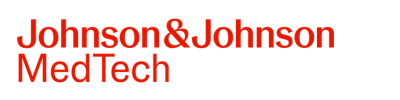

<div style="display:flex; align-items:center;">
  <img src="logo.png" width="200"/>
  <h1 style="margin-left:20px;">Control System Diagnostic Notebook</h1>
</div>


# Control System Diagnostic Notebook for Robotic Arm

## Objective
This notebook is designed to help identify and resolve response delays in the control code of a robotic arm.

- Diagnose the root cause of delays
- Optimize control code
- Document findings

**Note:** Focus on the `rotate_joint` command, as it has been flagged for delays and requires detailed analysis.



In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Command Delay Configuration

In [17]:
COMMAND_DELAY = {
    'move_arm': 0.10,
    'rotate_joint': 0.15,
    'adjust_grip': 0.05
}

def response_time(command):
    start = time.perf_counter()
    time.sleep(COMMAND_DELAY.get(command, 0.02))
    return time.perf_counter() - start

## Optimized Response Time Function

In [18]:
def optimized_response_time(original_time, efficiency=0.5):
    return original_time * (1 - efficiency)

## Benchmark Test

In [21]:
commands = ['move_arm', 'rotate_joint', 'adjust_grip']

original_times = []
optimized_times = []

for cmd in commands:
    t = response_time(cmd)
    original_times.append(t)
    optimized_times.append(optimized_response_time(t))

for i, cmd in enumerate(commands):
    print(f"{cmd}: {original_times[i]:.3f}s → {optimized_times[i]:.3f}s")

move_arm: 0.100s → 0.050s
rotate_joint: 0.150s → 0.075s
adjust_grip: 0.050s → 0.025s


## Performance Comparison Plot

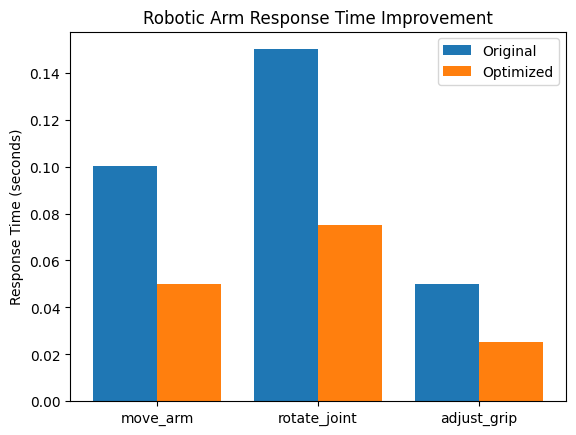

In [22]:
x = np.arange(len(commands))

plt.bar(x - 0.2, original_times, width=0.4, label='Original')
plt.bar(x + 0.2, optimized_times, width=0.4, label='Optimized')

plt.xticks(x, commands)
plt.ylabel('Response Time (seconds)')
plt.title('Robotic Arm Response Time Improvement')
plt.legend()
plt.show()